# Desafio Tech Challenge 

____

Marcio Bellini
marcio.bellini@gmail.com

Israel de Amorim Silva
raelamorim@hotmail.com

Ernesto de Oliveira
ernestodeoliveira@gmail.com

CARLOS MURILO SILVA
carlosmurilo@outlook.com

____

Tech  Challenge  é  o  projeto  que  engloba  os  conhecimentos  obtidos  em 
todas  as disciplinas  dessa  fase. Esta é  uma  atividade que,  em princípio,  deve 
ser desenvolvida em grupo. É importante atentar-se ao prazo de entrega, uma 
vez que essa atividade é obrigatória, valendo 90% da nota de todas as disciplinas 
da fase. 

____

### O problema 
Você  é  um(a)  profissional  encarregado(a)  de  desenvolver  um  modelo 
preditivo  de  regressão  para  prever  o  valor  dos  custos  médicos  individuais 
cobrados pelo seguro de saúde.  
A base de dados para este desafio pode ser algo como o demonstrado no 
exemplo a seguir:

Você precisa apenas alimentá-la com mais informações ou utilizar outra 
de sua preferência. 

____

### Tarefas 

#### Exploração de dados: 
- Carregue a base de dados e explore suas características; 
- Analise estatísticas descritivas e visualize distribuições relevantes. 

#### Pré-processamento de dados: 
- Realize a limpeza dos dados, tratando valores ausentes (se 
necessário); 
- Converta variáveis categóricas em formatos adequados para 
modelagem. 
 
#### Modelagem: 
- Crie  um modelo  preditivo  de  regressão utilizando uma técnica à  sua 
escolha (por exemplo: Regressão Linear, Árvores de Decisão etc); 
- Divida o conjunto de dados em conjuntos de treinamento e teste. 
Treinamento e avaliação do modelo: 
- Treine o modelo com o conjunto de treinamento. 
Validação estatística: 
- Utilize métricas estatísticas para validar a eficácia do modelo (p-value, 
intervalos de confiança). 

#### O que avaliaremos: 
- Apresente resultados visuais, como gráficos de previsões vs. valores 
reais; 
- Elabore um  relatório que inclua uma análise dos resultados, insights 
obtidos e validação estatística. 
 
#### Observações: 
- Esperamos  que  o  modelo  seja  capaz  de  fazer  previsões  confiáveis  dos 
custos médicos individuais com base nas características fornecidas. 

____

### Exploração de dados - Carga dos dados

In [39]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados
df = pd.read_csv("insurance.csv")

# Conhecendo os dados
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


____

### Exploração de dados - Análises Estatísticas

In [40]:
df.shape

(1338, 7)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
set(df['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [43]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [44]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


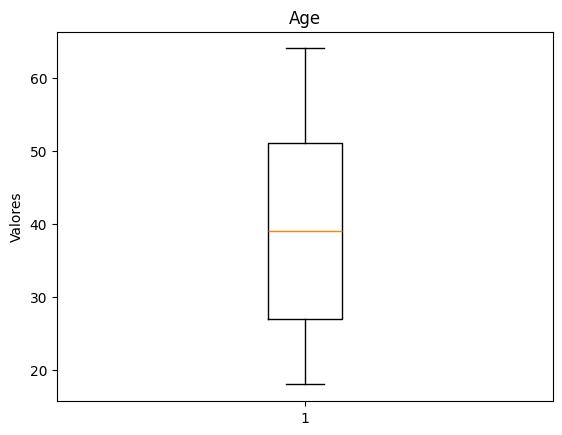

In [45]:
# Criar o gráfico de boxplot
plt.boxplot(df['age'])
plt.title('Age')
plt.ylabel('Valores')
plt.show()

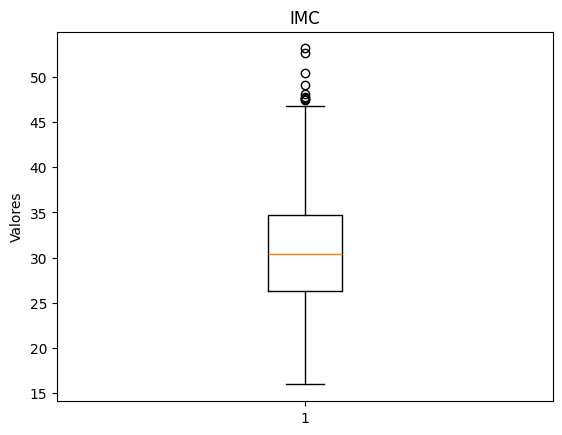

In [46]:
# Criar o gráfico de boxplot
plt.boxplot(df['bmi'])
plt.title('IMC')
plt.ylabel('Valores')
plt.show()

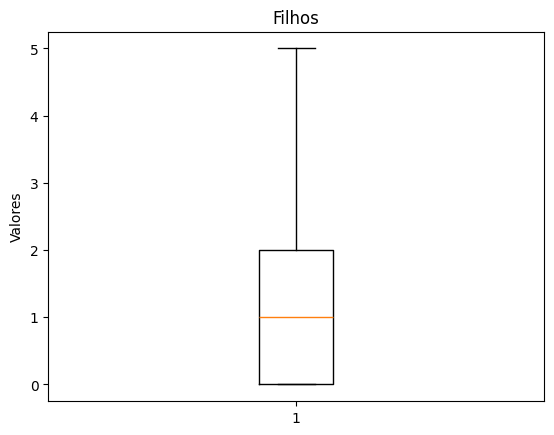

In [47]:
# Criar o gráfico de boxplot
plt.boxplot(df['children'])
plt.title('Filhos')
plt.ylabel('Valores')
plt.show()

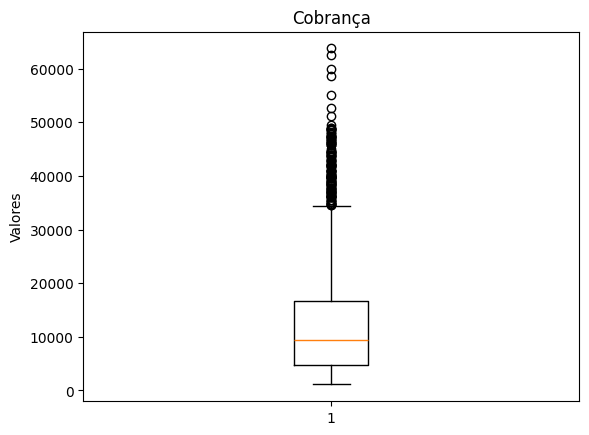

In [48]:
# Criar o gráfico de boxplot
plt.boxplot(df['charges'])
plt.title('Cobrança')
plt.ylabel('Valores')
plt.show()

In [49]:
import seaborn as sns
import numpy as np

# Criando dataframe somente com nossas variáveis numericas
df_numerico = df.select_dtypes([np.number])

# Calcula a matriz de correlação
correlation_matrix = df_numerico.corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


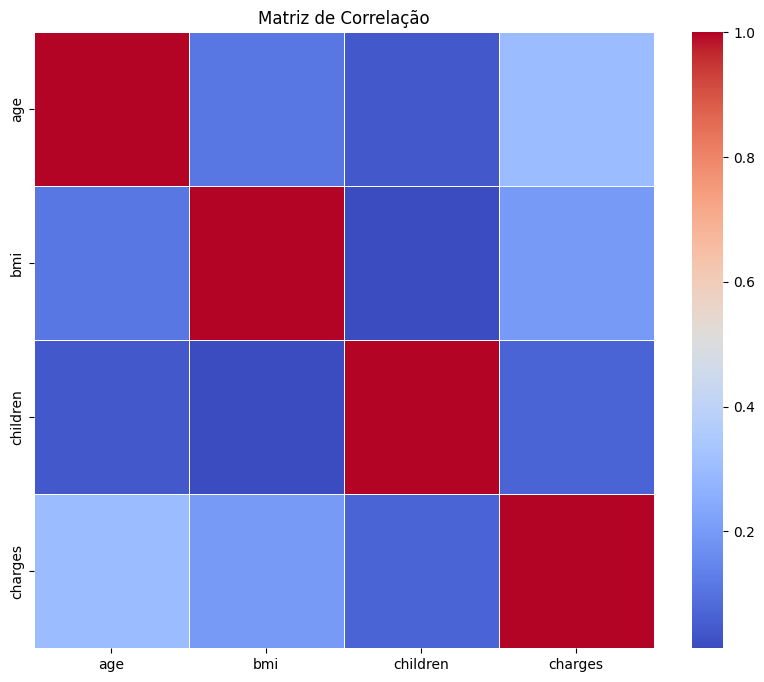

In [50]:
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

____

#### Pré-processamento de dados - Transformação das variáveis categóricas e alfanuméricas

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Separando as variaveis numericas
df_transformed = df.select_dtypes([np.number])

# Ajustar e transformar os rótulos
label_encoder = LabelEncoder()

df_transformed['sex'] = label_encoder.fit_transform(df['sex'])
df_transformed['smoker'] = label_encoder.fit_transform(df['smoker'])

# Ajustando as variavel categorica region
one_hot_encoder = OneHotEncoder(dtype=int, sparse_output=False)

encoded_region = one_hot_encoder.fit_transform(df[['region']])
encoded_df = pd.DataFrame(encoded_region, columns=['northeast', 'northwest', 'southeast', 'southwest'])

# juntando tudo
df_transformed.reset_index(inplace=True) 
encoded_df.reset_index(inplace=True)
                                                
df_transformed = pd.merge(df_transformed, encoded_df, on='index', how='inner').drop(columns='index')
df_transformed.head(10)

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,1,0,0,0
9,60,25.840,0,28923.13692,0,0,0,1,0,0


____

#### Modelagem - Divisão do conjunto de dados

In [52]:
# Separando as variáveis
from sklearn.model_selection import train_test_split

x = df_transformed.drop(columns=['charges']) # Variáveis características
y = df_transformed['charges'] # O que eu quero prever. (Target)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


____

#### Modelagem - Escalonamento das variáveis

In [53]:
# Escalonando as variáveis
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() #chamando o metodo de normalização dos dados (0-1)

scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

x_train_scaled

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

____

#### Modelagem - Validação do modelo de KNN - busca dos hiperparâmetros

Text(0, 0.5, 'Mean Error')

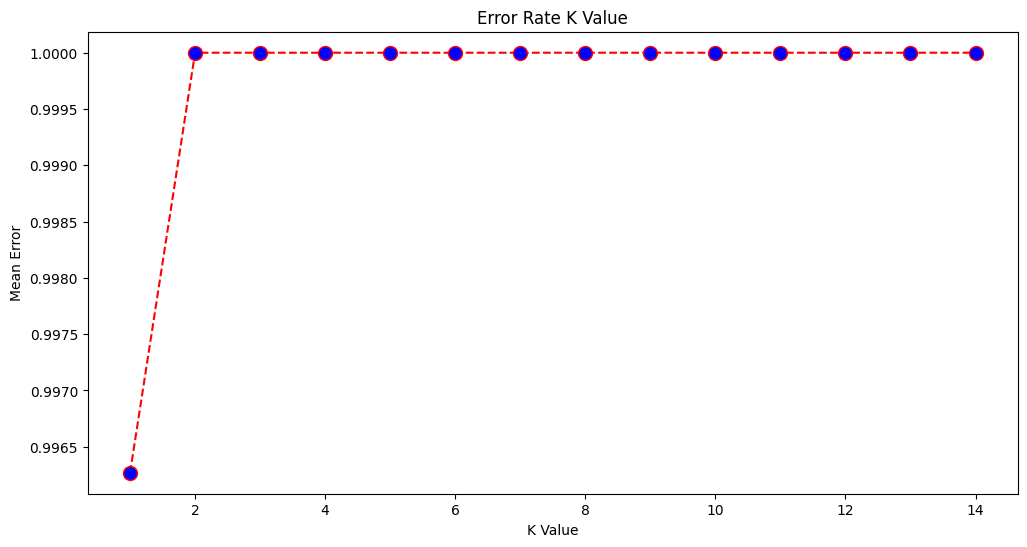

In [54]:
from sklearn.model_selection import GridSearchCV #metodo para seleção dos melhores Ks (#Basicamente a busca por força bruta)
from sklearn.metrics import make_scorer, accuracy_score, f1_score #métricas de validação
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor 

error = [] #armazenar os erros

# Calculating error for K values between 1 and 15
for i in range(1, 15):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    pred_i = knn.predict(x_test_scaled)
    error.append(np.mean(pred_i != y_test))

# Ploting graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

____

#### Modelagem - Aplicando validação cruzada para escolha do melhor modelo

In [68]:
# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor 

# Cross-Validation models.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Models
linear = LinearRegression()
rf = RandomForestRegressor(random_state=7) 
dt = DecisionTreeRegressor(random_state = 7)  
knn = KNeighborsRegressor(n_neighbors=2)

def AplicaValidacaoCruzada(x_axis, y_axis):

    # Configuração de KFold.
    kfold  = KFold(n_splits=10, shuffle=True) 

    # Axis
    x = x_axis
    y = y_axis

    # Linear Regression - Training
    linear.fit(x_train_scaled, y_train)

    # RandomForest - Training
    rf.fit(x_train_scaled, y_train) 

    # Decision Tree - Training
    dt.fit(x_train_scaled, y_train) 

    # KNN Regression - Training
    knn.fit(x_train_scaled, y_train)
    
    # Applyes KFold to models.
    knn_result = cross_val_score(knn, x, y, cv = kfold)
    dt_result = cross_val_score(dt, x, y, cv = kfold)
    linear_result = cross_val_score(linear, x, y, cv = kfold)
    rf_result = cross_val_score(rf, x, y, cv = kfold)

    # Creates a dictionary to store Linear Models.
    dic_models = {
        "KNN": round(knn_result.mean(), 3),
        "DT": round(dt_result.mean(), 3),
        "LINEAR": round(linear_result.mean(), 3),
        "RF": round(rf_result.mean(), 3)
    }
    # Select the best model.
    melhorModelo = max(dic_models, key=dic_models.get)

    from tabulate import tabulate
    table = tabulate([
        ["KNN", dic_models['KNN']], 
        ["Decision Tree", dic_models['DT']], 
        ["Linear Regression", dic_models['LINEAR']], 
        ["Random Forest", dic_models['RF']], 
    ], headers=["Modelo", "(R^2)"])
    print(table)
    print("\nO melhor modelo é: \"{0}\" com o valor: \"{1}\""
          .format(melhorModelo, dic_models[melhorModelo]))

In [69]:
AplicaValidacaoCruzada(x, y)

Modelo               (R^2)
-----------------  -------
KNN                 -0.003
Decision Tree        0.7
Linear Regression    0.745
Random Forest        0.834

O melhor modelo é: "RF" com o valor: "0.834"


____

#### Modelagem - Realizando previsões com o modelo escolhido
____

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fazendo previsões no conjunto de teste
previsoes = rf.predict(x_test_scaled)

# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico:.2f}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio:.2f}')
print(f'R² (coeficiente de determinação): {r_quadrado:2f}')

Erro Médio Quadrático: 21311008.29
Erro Absoluto Médio: 2515.34
R² (coeficiente de determinação): 0.862730


____

#### Modelagem - Plotando o gráfico de resíduos
____

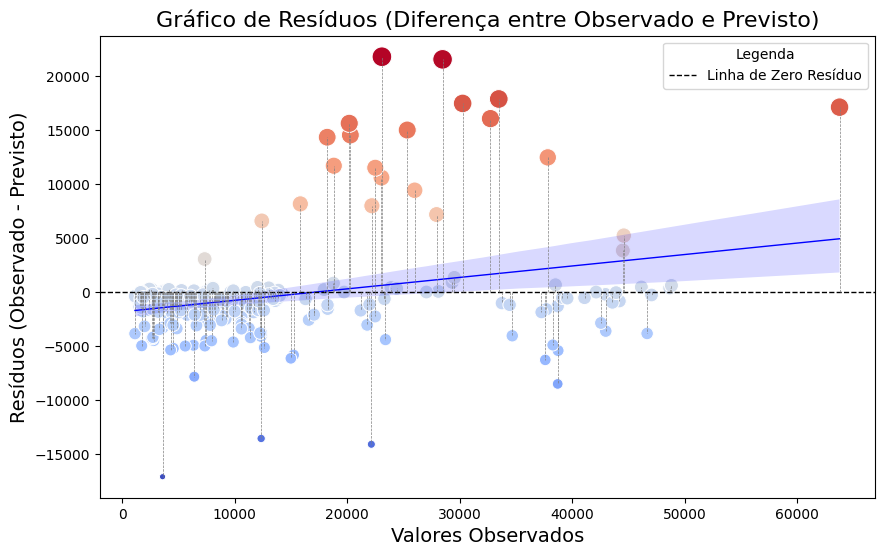

In [82]:
y_values = y_test.values

# Calcular resíduos
residuals = y_values - previsoes

# Plotar gráfico de resíduos
plt.figure(figsize=(10, 6))

# Adicionar cores aos pontos de acordo com a magnitude dos resíduos
scatter = sns.scatterplot(x=y_values, y=residuals, palette='coolwarm', hue=residuals, size=residuals, sizes=(20, 200), legend=False)

# Adicionar linha de tendência
sns.regplot(x=y_values, y=residuals, scatter=False, color='blue', line_kws={"linewidth":1, "label": "Linha de Tendência"})

# Adicionar linhas horizontais para zero
plt.axhline(0, color='black', linestyle='--', linewidth=1, label="Linha de Zero Resíduo")

# Adicionar linhas entre os pontos observados e previstos
for i in range(len(y_values)):
    plt.plot([y_values[i], y_values[i]], [0, residuals[i]], color='grey', linestyle='--', linewidth=0.5)

# Definir título e rótulos
plt.title('Gráfico de Resíduos (Diferença entre Observado e Previsto)', fontsize=16)
plt.xlabel('Valores Observados', fontsize=14)
plt.ylabel('Resíduos (Observado - Previsto)', fontsize=14)

# Adicionar legenda
plt.legend(title="Legenda", loc='upper right')

# Mostrar gráfico
plt.show()
